In [ ]:
%matplotlib inline 
#to include graphs nedfarrayt to the code
#useful libraries
import numpy as np #linear algebra
import math
import pandas as pd #data processing
import matplotlib.pyplot as plt #plotting
import seaborn as sns #visualization


file='finalnew.csv'
df = pd.read_csv(file)
print(df.describe()) #statistics 

         Unnamed: 0  totaltraveltimeinhours  ...  earnings_gross  delay_probability
count  85153.000000            85153.000000  ...    85153.000000       85153.000000
mean   42576.000000                4.272064  ...      115.954804           0.697344
std    24581.698073                2.947939  ...       94.155971           0.150572
min        0.000000                0.120000  ...        2.930000           0.400000
25%    21288.000000                2.320000  ...       59.140000           0.600000
50%    42576.000000                3.740000  ...       94.830000           0.600000
75%    63864.000000                5.440000  ...      142.240000           0.880000
max    85152.000000               25.000000  ...     1121.310000           0.928000

[8 rows x 14 columns]


In [ ]:
#drop redundant column via reading
df.drop('Unnamed: 0', axis=1, inplace=True)

There is an idea to perform k-means clustering on only old and newly formed numerical data (since the encoding could theoritacally distort the alghorithm which better hande combinations of numerical features only), also the column with labels also would be dropped in this case

In [ ]:
km=df.copy() #make a copy of data for clustering

In [ ]:
km.drop(km.columns[[5, 6, 7, 8, 9, 10, 12, 13, 16, 20]], axis = 1, inplace = True)# categorical columns were dropped

In [ ]:
km # 13 numerical columns

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,distance,numtravelfrom,numtravelto,multimodality,safety_boost,caloriesBurnt_avg,earnings_gross,delay_probability
0,0.39,0.86,0,0.000,0.00,10.305,582415,259105,0,13,33,9.53,0.7
1,0.13,2.17,0,0.000,0.00,10.305,582415,259105,0,11,11,3.18,0.6
2,0.13,2.17,0,0.000,0.00,10.305,582415,259105,0,11,11,3.18,0.6
3,0.39,0.86,0,0.000,0.00,10.305,582415,259105,0,13,33,9.53,0.7
4,0.39,0.86,0,0.000,0.00,10.305,582415,259105,0,13,33,9.53,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85148,5.17,91.20,1,0.000,0.68,463.689,126954,209566,0,11,437,142.97,0.6
85149,6.13,86.04,1,0.000,1.53,463.689,126954,209566,0,11,518,187.21,0.6
85150,4.54,22.47,1,0.177,0.25,463.689,126954,209566,1,2,389,117.07,0.8
85151,4.54,22.47,1,0.177,0.25,463.689,126954,209566,1,2,389,117.07,0.8


check by Hopkins if the data could be clustered

In [ ]:
dfhopkins=km.copy()

In [ ]:
import sklearn 
from sklearn.preprocessing import StandardScaler
# to standardize values through scaler
scaler = StandardScaler()
# fit_transform
dfnew_scaled = scaler.fit_transform(dfhopkins)

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
#generate a simulated data set (random D) drawn from a random uniform distribution with n points (q1,q2,…, qn) and the same variation as the original real data set D.
    rand_X = sample(range(0, n, 1), m)
 #compute the distance, xi, from each real point to each nearest neighbour: For each point, pi ∈ D, find it’s nearest neighbour pj; 
 #then, compute the distance between pi and pj and denote it as xi=dist(pi,pj)
    ujd = []
#compute the distance, yi from each artificial point to the nearest real data point: For each point qi ∈ random D, find it’s nearest neighbour qj in D; then compute the distance between qi and qj and denote it yi=dist(qi,qj)
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
#calculate the Hopkins statistic (H) as the mean nearest neighbour distance in the random data set divided by the sum of the mean nearest neighbour distances in the real and across the simulated data set.
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
#convert “dfscaled” to pandas DataFrame & define previous column names 
dfnew_scaled = pd.DataFrame(dfnew_scaled)
dfnew_scaled.columns = ['totaltraveltimeinhours','totalprice','totalnumberofchanges','totalwalkingdistance', 'totalwaitingtime', 'distance','numtravelfrom',	'numtravelto',	'multimodality',	'safety_boost',	'caloriesBurnt_avg',	'earnings_gross',	'delay_probability']

In [ ]:
#apply Hopkins function to the dataset
hopkins(dfnew_scaled) #running time is 1 minute

0.999482047399628

Apply Hopkins function to the dataset- the clusters should be meaningful considering the numerical columns.

A function "hopkins" compares scatter spread of data points from our dataset to random scatter data which contains no cluster tendency or properties,using NearestNeighbors, meaning that the test tells us how much percentage different is our data from random scatter data We could apply Hopkins test before scaling or after the scaling as the scale of dfarray-adfarrayis & y-adfarrayis changes- it does not affect the spread of points. We conduct the Hopkins Statistic test iteratively, using 0.5 as the threshold to reject the alternative hypothesis.

If H < 0.5, then it is unlikely that data has statistically significant clusters. If the value of Hopkins statistics is close to 1, then we can reject the null hypothesis and conclude that the dataset has significantly clusterable data with respect to the columns.

Our obtained value is edfarraytremely close to 1 even taking to consideration the adding of engineered features. The numerical columns of dataframe are perfectly clusterable.

In [ ]:
#the duplicated rows after dropping the columns were removed
km.drop_duplicates(keep='last', inplace=True)
km

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,distance,numtravelfrom,numtravelto,multimodality,safety_boost,caloriesBurnt_avg,earnings_gross,delay_probability
39,0.39,0.86,0,0.000,0.00,10.305,582415,259105,0,13,33,9.53,0.7
117,0.25,3.83,0,0.000,0.00,13.746,582415,259105,0,1,21,6.11,0.4
118,0.13,2.89,0,0.000,0.00,10.305,582415,259105,0,11,11,3.18,0.6
123,0.13,2.17,0,0.000,0.00,10.305,582415,259105,0,11,11,3.18,0.6
124,0.39,0.86,0,0.300,0.00,10.305,582415,259105,0,13,42,9.53,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85147,3.63,106.46,1,0.000,0.48,463.689,126954,209566,0,11,307,100.45,0.6
85148,5.17,91.20,1,0.000,0.68,463.689,126954,209566,0,11,437,142.97,0.6
85149,6.13,86.04,1,0.000,1.53,463.689,126954,209566,0,11,518,187.21,0.6
85151,4.54,22.47,1,0.177,0.25,463.689,126954,209566,1,2,389,117.07,0.8


From 85153 rows we ended up with 10379 rows, to save the size of df even 8 times lower we won't be removing outliers via IQR technique, we would assess our groups that are going to encompass all the values

In [ ]:
clscaled=km.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler # feature scaling
scaled_new = MinMaxScaler().fit_transform(clscaled[['totaltraveltimeinhours', 'totalprice','totalnumberofchanges','totalwalkingdistance','totalwaitingtime', 'distance','numtravelfrom',	'numtravelto',	'multimodality',	'safety_boost',	'caloriesBurnt_avg',	'earnings_gross',	'delay_probability']])
clscaled[['totaltraveltimeinhours', 'totalprice','totalnumberofchanges','totalwalkingdistance','totalwaitingtime', 'distance','numtravelfrom',	'numtravelto',	'multimodality',	'safety_boost',	'caloriesBurnt_avg',	'earnings_gross',	'delay_probability']] = scaled_new

In [ ]:
#convert dataframe to numpy array
dfarray = np.array(clscaled) 
dfarray

array([[1.08520900e-02, 3.86718966e-04, 0.00000000e+00, ...,
        1.08747045e-02, 5.90139309e-03, 5.68181818e-01],
       [5.22508039e-03, 8.59068560e-03, 0.00000000e+00, ...,
        5.20094563e-03, 2.84339849e-03, 0.00000000e+00],
       [4.01929260e-04, 5.99414397e-03, 0.00000000e+00, ...,
        4.72813239e-04, 2.23537617e-04, 3.78787879e-01],
       ...,
       [2.41559486e-01, 2.35677587e-01, 1.42857143e-01, ...,
        2.40189125e-01, 1.64774048e-01, 3.78787879e-01],
       [1.77652733e-01, 6.00795536e-02, 1.42857143e-01, ...,
        1.79196217e-01, 1.02058334e-01, 7.57575758e-01],
       [1.40675241e-01, 2.99154743e-01, 1.42857143e-01, ...,
        1.39952719e-01, 7.80146283e-02, 3.78787879e-01]])

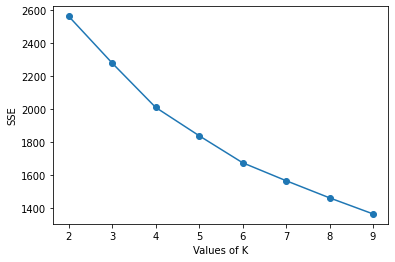

In [ ]:
#choose on number of clusters
from sklearn.cluster import KMeans
# amount of values to be tested for K
Ks = range(2, 10)

# list to hold on the metrics for each value of K
results = []

# running the loop
for K in Ks:
    
    model = KMeans(n_clusters = K)
    model.fit(dfarray)
    
    results.append(model.inertia_) # Inertia: Sum of distances of samples to their closest cluster center

# plot the final result
plt.plot(Ks, results, 'o-')
plt.xlabel("Values of K")
plt.ylabel("SSE")
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5
plt.show()

In [ ]:
pip install kneed

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(
        range(2, 10), results, curve="convex", direction="decreasing")

kl.elbow


5

We can hypothetically choose the number of clusters as 5

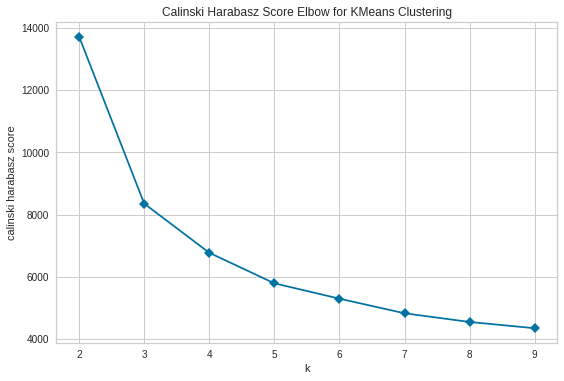

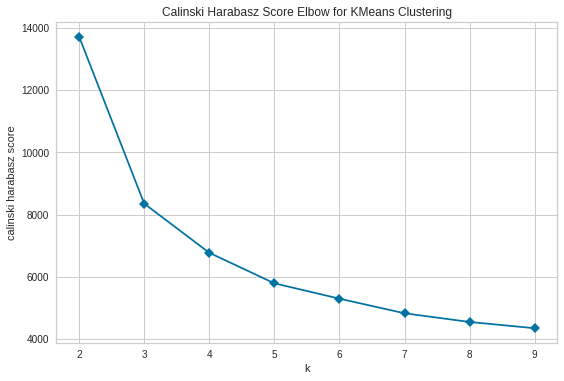

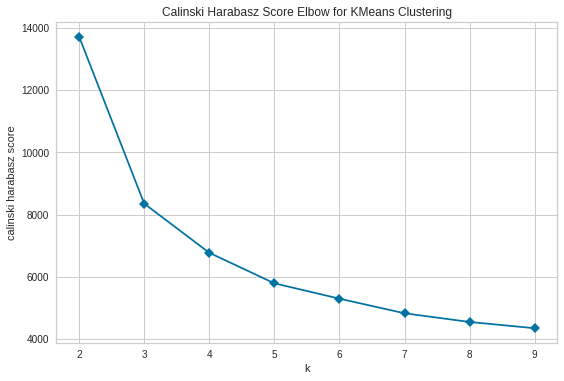

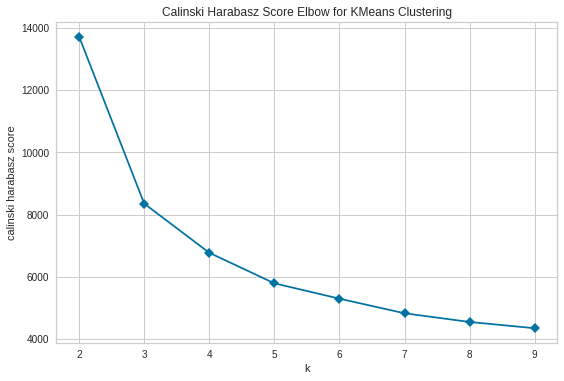

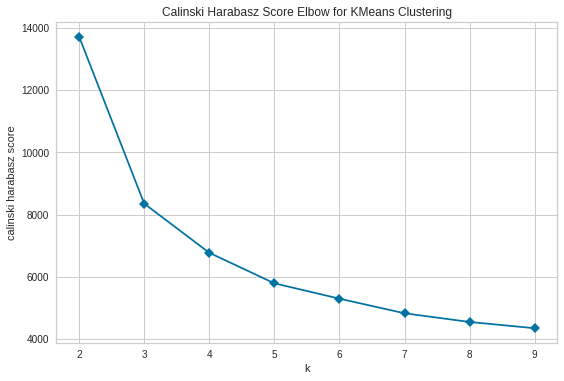

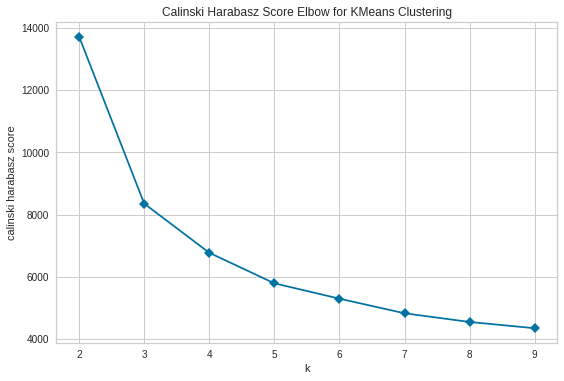

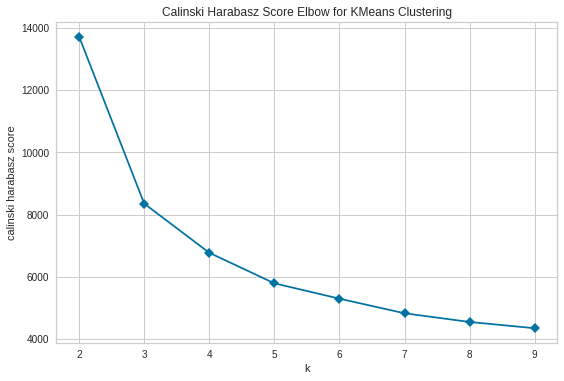

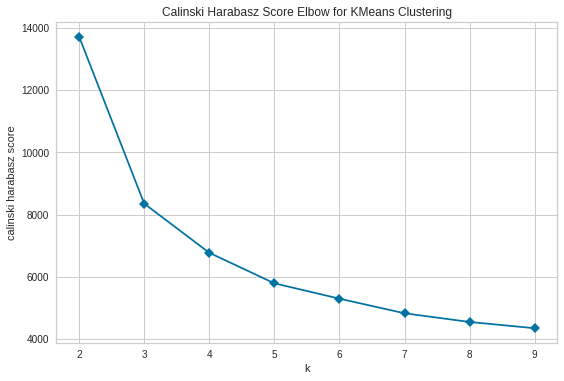

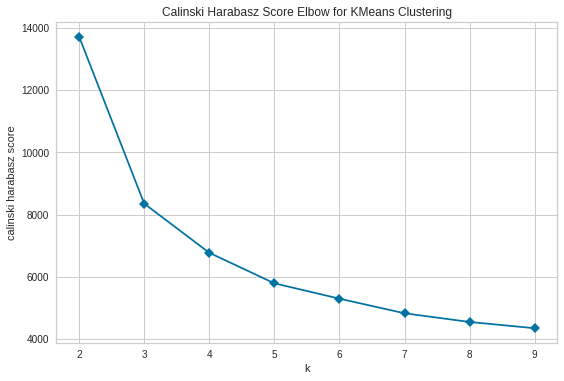

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    #initializing the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dfarray)
    #using Elbow Plot
    visualizer= KElbowVisualizer(clusterer,k=(2,10),
    metric  ='calinski_harabasz',locate_elbow=False, timings= False) #usage of another metric
    #fitting the data to the visualizer
    visualizer.fit(dfarray)  
    #render the figure
    visualizer.show() 

The Calinski-Harabasz index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances.
The technique proposes to choose the number of clusters as 2 (only 2 groups)

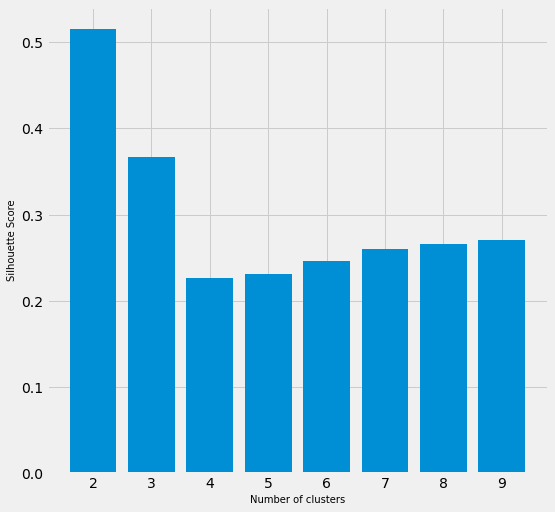

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(dfarray, KMeans(n_clusters = n_cluster).fit_predict(dfarray))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8, 9] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [ ]:
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(dfarray)
    centers = clusterer.cluster_centers_

    score = silhouette_score(dfarray, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5153262450924294)
For n_clusters = 3, silhouette score is 0.36775293555680166)
For n_clusters = 4, silhouette score is 0.22668023595824388)
For n_clusters = 5, silhouette score is 0.23141027377772733)
For n_clusters = 6, silhouette score is 0.24682771320300603)
For n_clusters = 7, silhouette score is 0.26014014516168843)
For n_clusters = 8, silhouette score is 0.26264319821758675)
For n_clusters = 9, silhouette score is 0.27030703368529113)


the graph based on fit_predict also suggests using 2 (the highest Silhouette) - apply 2 clusters to get only 2 groups

In [ ]:
from sklearn.cluster import KMeans

# creating the model
#kmeans = KMeans(n_clusters = 5, verbose=1)
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42, verbose=1)

# training our model and transform to cluster-distance space
trans= kmeans.fit_transform(dfarray)

# edfarrayplore the labels (clusters) assigned for each data point with the function labels_
kmeans.labels_

# assigning the labels to the not scaled dataset
km['kmeans_cluster'] = kmeans.labels_


Initialization complete
Iteration 0, inertia 3636.893321200915
Iteration 1, inertia 2565.0033697701174
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4200.417864752734
Iteration 1, inertia 2565.0429321424863
Iteration 2, inertia 2565.0033697701174
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3864.8616304050647
Iteration 1, inertia 2565.0033697701174
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4774.533484336316
Iteration 1, inertia 2565.0033697701174
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3785.496054265155
Iteration 1, inertia 2565.0033697701174
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 13471.579602352469
Iteration 1, inertia 2575.605423504052
Iteration 2, inertia 2565.0033697701174
Converged at iteration 2: strict convergence.
Initialization complete
I

In [ ]:
km#check the assigned clusters

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,distance,numtravelfrom,numtravelto,multimodality,safety_boost,caloriesBurnt_avg,earnings_gross,delay_probability,kmeans_cluster
39,0.39,0.86,0,0.000,0.00,10.305,582415,259105,0,13,33,9.53,0.7,0
117,0.25,3.83,0,0.000,0.00,13.746,582415,259105,0,1,21,6.11,0.4,0
118,0.13,2.89,0,0.000,0.00,10.305,582415,259105,0,11,11,3.18,0.6,0
123,0.13,2.17,0,0.000,0.00,10.305,582415,259105,0,11,11,3.18,0.6,0
124,0.39,0.86,0,0.300,0.00,10.305,582415,259105,0,13,42,9.53,0.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85147,3.63,106.46,1,0.000,0.48,463.689,126954,209566,0,11,307,100.45,0.6,0
85148,5.17,91.20,1,0.000,0.68,463.689,126954,209566,0,11,437,142.97,0.6,0
85149,6.13,86.04,1,0.000,1.53,463.689,126954,209566,0,11,518,187.21,0.6,0
85151,4.54,22.47,1,0.177,0.25,463.689,126954,209566,1,2,389,117.07,0.8,1


In [ ]:
km.kmeans_cluster.unique() #make sure that only 2 groups were assigned

array([0, 1], dtype=int32)

only 2 different groups as 2 techniques proposed

In [ ]:
k=km.copy()

In [ ]:
#drop redundant column via reading
k.drop('kmeans_cluster', axis=1, inplace=True)

In [ ]:
dfnotscaled=np.array(k)
dfnotscaled

array([[3.9000e-01, 8.6000e-01, 0.0000e+00, ..., 3.3000e+01, 9.5300e+00,
        7.0000e-01],
       [2.5000e-01, 3.8300e+00, 0.0000e+00, ..., 2.1000e+01, 6.1100e+00,
        4.0000e-01],
       [1.3000e-01, 2.8900e+00, 0.0000e+00, ..., 1.1000e+01, 3.1800e+00,
        6.0000e-01],
       ...,
       [6.1300e+00, 8.6040e+01, 1.0000e+00, ..., 5.1800e+02, 1.8721e+02,
        6.0000e-01],
       [4.5400e+00, 2.2470e+01, 1.0000e+00, ..., 3.8900e+02, 1.1707e+02,
        8.0000e-01],
       [3.6200e+00, 1.0902e+02, 1.0000e+00, ..., 3.0600e+02, 9.0180e+01,
        6.0000e-01]])

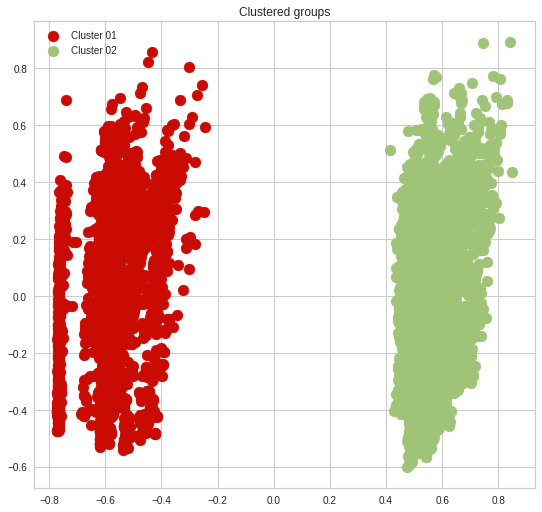

In [ ]:
#plotting through PCA
from sklearn.decomposition import PCA
import pylab as pl

# reducing data dimensions 
PCA_ = PCA(n_components = 2).fit(clscaled) #for the sake of visualisation 

# applying the PCA
PCA_2 = PCA_.transform(clscaled)


# plot size
from pylab import rcParams
rcParams['figure.figsize'] = (8.0, 8.0)

# plotting each point individually depending on their cluster
for i in range(0, PCA_2.shape[0]):
    
    # If the 'i' data point is in cluster 0, it will be plotted as the formatting inside the if functions
    
    if kmeans.labels_[i] == 0:
        CLUSTER_01 = pl.scatter(PCA_2[i,0], PCA_2[i,1], c ='r', marker = 'o', s = 120)
        
    elif kmeans.labels_[i] == 1:
        CLUSTER_02 = pl.scatter(PCA_2[i,0], PCA_2[i,1], c ='g', marker = 'o', s = 120)

    #elif kmeans.labels_[i] == 2:
        #CLUSTER_03 = pl.scatter(PCA_2[i,0], PCA_2[i,1], c ='b', marker = 'o', s = 120)

    #elif kmeans.labels_[i] == 3:
        #CLUSTER_04 = pl.scatter(PCA_2[i,0], PCA_2[i,1], c ='y', marker = 'o', s = 120)

    #elif kmeans.labels_[i] == 4:
        #CLUSTER_05 = pl.scatter(PCA_2[i,0], PCA_2[i,1], c ='c', marker = 'o', s = 120)
        
        
# formatting the plot
pl.legend([CLUSTER_01, CLUSTER_02],
                  ['Cluster 01', 'Cluster 02'])
pl.title('Clustered groups')
        
pl.show()

through PCA technique the graph is not really self-explanatory

In [ ]:
t=clscaled.copy() #for parallel_plot

In [ ]:
t['kmeans_cluster'] = kmeans.labels_ #assugn the labels

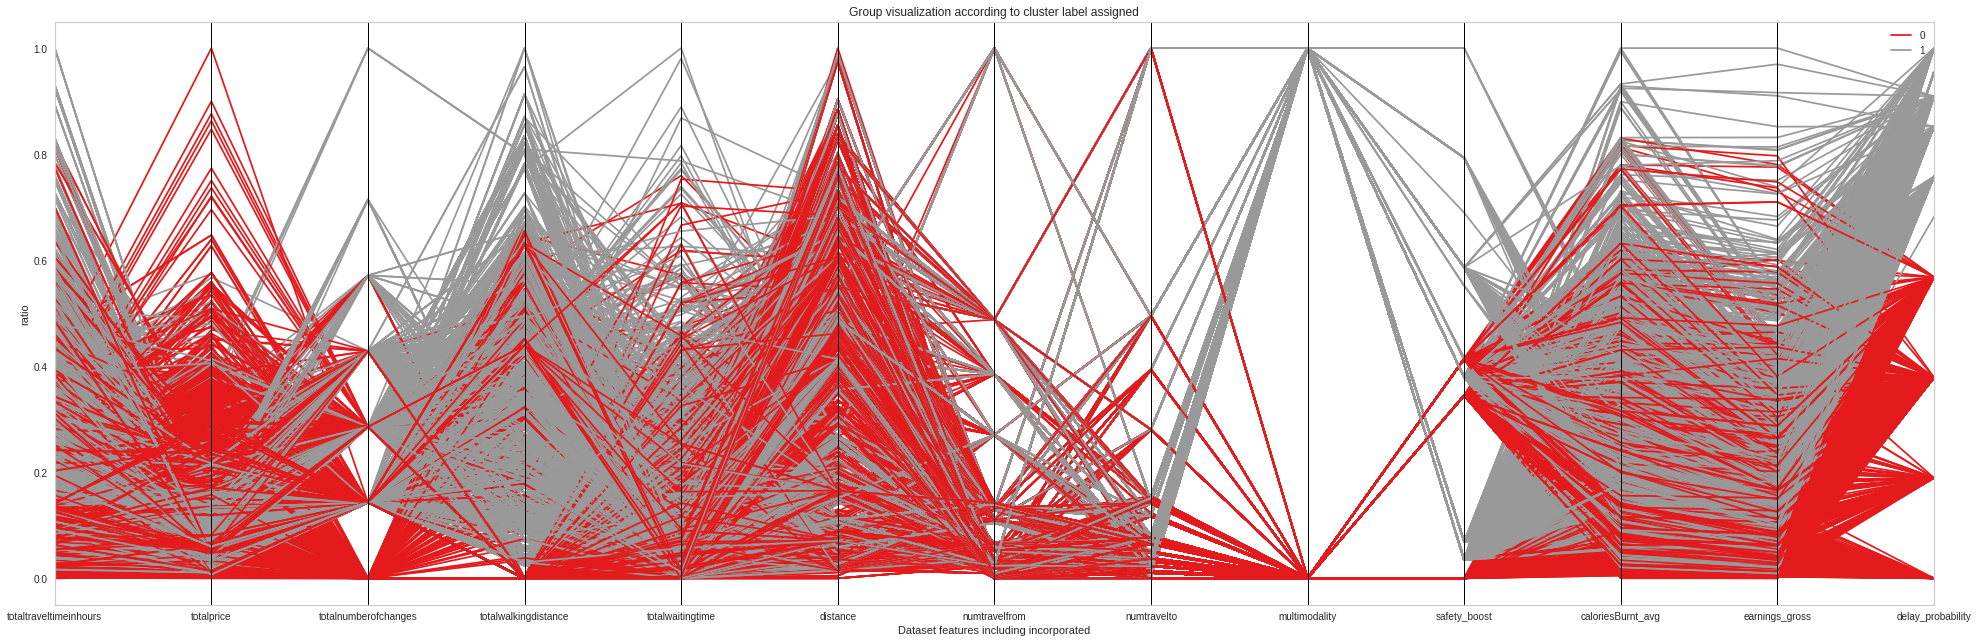

In [ ]:
#make the plot to get insights about the clusters
from pandas.plotting import parallel_coordinates #better for k-means visualization
plt.figure(figsize=(30,10))
parallel_coordinates(t, 'kmeans_cluster', colormap=plt.get_cmap("Set1")) #check the data and hue, set the color ranges
plt.title("Group visualization according to cluster label assigned")
plt.xlabel("Dataset features including incorporated")
plt.ylabel("ratio")
plt.savefig('graph.png')
plt.show()

2 groups:
red and grey

red: expensive long-distanced trips with low and up to moderate (50-50 chance of delay)
grey- trips that include high walking distance,more than 1 mode involved however its possible to earn money wihout being distracted and of course reduce the calories. The highest chance of the delay.

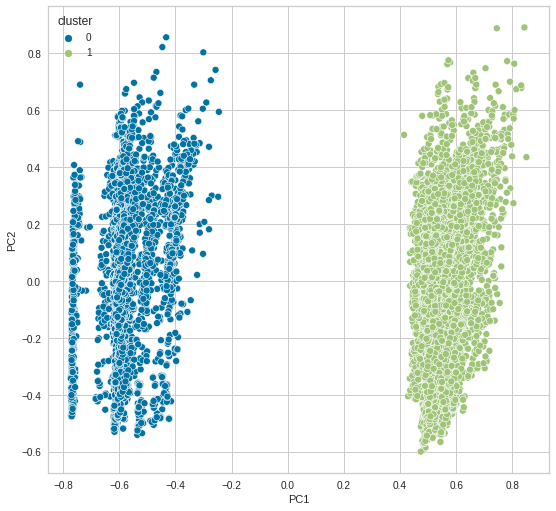

In [ ]:
#plotting with PCA again
from sklearn.decomposition import PCA
import pylab as pl

pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(clscaled),columns=['PC1','PC2']) 
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

In [ ]:
Same configuration

In [ ]:
# the results for 1 and 2 groups
cluster_1= km[km['kmeans_cluster']== 0]
cluster_1.head(20) #get the results

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,distance,numtravelfrom,numtravelto,multimodality,safety_boost,caloriesBurnt_avg,earnings_gross,delay_probability,kmeans_cluster
39,0.39,0.86,0,0.0,0.00,10.305,582415,259105,0,13,33,9.53,0.7,0
117,0.25,3.83,0,0.0,0.00,13.746,582415,259105,0,1,21,6.11,0.4,0
118,0.13,2.89,0,0.0,0.00,10.305,582415,259105,0,11,11,3.18,0.6,0
123,0.13,2.17,0,0.0,0.00,10.305,582415,259105,0,11,11,3.18,0.6,0
124,0.39,0.86,0,0.3,0.00,10.305,582415,259105,0,13,42,9.53,0.7,0
225,7.77,96.05,2,0.0,0.00,326.313,158741,209566,0,11,657,189.90,0.6,0
274,7.77,96.05,2,0.0,4.60,326.313,158741,209566,0,11,657,302.32,0.6,0
295,7.77,96.05,2,0.0,4.58,326.313,158741,209566,0,11,657,301.83,0.6,0
311,3.53,93.60,0,0.0,0.00,314.172,158741,209566,0,1,298,86.27,0.4,0
326,1.55,28.21,0,0.0,0.00,103.155,248878,330579,0,11,131,37.88,0.6,0


In [ ]:
# the results for 1 and 2 groups
cluster_2= km[km['kmeans_cluster']== 1]
cluster_2.head(20) #get the results

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,distance,numtravelfrom,numtravelto,multimodality,safety_boost,caloriesBurnt_avg,earnings_gross,delay_probability,kmeans_cluster
149,3.95,91.02,0,0.000,0.00,326.313,158741,209566,1,12,334,96.54,0.88,1
150,3.65,91.02,0,0.000,0.00,326.313,158741,209566,1,12,308,89.21,0.88,1
153,3.18,96.41,0,0.000,0.00,326.313,158741,209566,1,12,269,77.72,0.88,1
154,3.18,91.63,0,0.000,0.00,326.313,158741,209566,1,12,269,77.72,0.88,1
155,3.48,91.13,0,0.000,0.00,326.313,158741,209566,1,12,294,85.05,0.88,1
156,3.98,27.43,0,0.000,0.00,326.313,158741,209566,1,2,336,97.27,0.80,1
157,5.57,22.47,0,0.000,0.00,326.313,158741,209566,1,2,471,136.13,0.80,1
187,3.18,96.41,1,0.000,0.00,326.313,158741,209566,1,12,269,77.72,0.88,1
188,5.57,22.47,1,0.000,0.00,326.313,158741,209566,1,2,471,136.13,0.80,1
208,3.63,96.39,2,0.632,0.00,326.313,158741,209566,1,12,325,88.72,0.88,1


In [ ]:
kmeans.cluster_centers_ #getting the centroids

array([[ 1.57403641e-01,  1.75001329e-01,  1.26459579e-01,
         4.98614998e-02,  2.42778414e-02,  4.51509004e-01,
         8.68095060e-02,  8.95522122e-02, -9.88098492e-15,
         3.24288970e-01,  1.57201064e-01,  9.68787151e-02,
         3.80454427e-01],
       [ 2.36718853e-01,  1.04450374e-01,  1.90530457e-01,
         2.15579863e-01,  4.07652296e-02,  4.34730031e-01,
         1.36622450e-01,  1.21860523e-01,  1.00000000e+00,
         2.61748043e-01,  2.38283683e-01,  1.47673415e-01,
         8.77395033e-01]])

In [ ]:
c = pd.DataFrame(kmeans.cluster_centers_)
c.columns = ['totaltraveltimeinhours', 'totalprice','totalnumberofchanges','totalwalkingdistance','totalwaitingtime', 'distance','numtravelfrom',	'numtravelto',	'multimodality',	'safety_boost',	'caloriesBurnt_avg',	'earnings_gross',	'delay_probability']

In [ ]:
#append column cluster to the centers space
ss = pd.Series(['1','2'], index=[0, 1])
c['cluster'] = ss.values

In [ ]:
#assess the centers
c

,totaltraveltimeinhours,totalprice,totalnumberofchanges,totalwalkingdistance,totalwaitingtime,distance,numtravelfrom,numtravelto,multimodality,safety_boost,caloriesBurnt_avg,earnings_gross,delay_probability,cluster
0,0.157404,0.175001,0.12646,0.049861,0.024278,0.451509,0.086810,0.089552,-9.880985e-15,0.324289,0.157201,0.096879,0.380454,1
1,0.236719,0.104450,0.19053,0.215580,0.040765,0.434730,0.136622,0.121861,1.000000e+00,0.261748,0.238284,0.147673,0.877395,2


In [ ]:
#investigate the groups with respect to mean value

def meanvalue(dat):
  meanvalue = dat[['totaltraveltimeinhours', 'totalprice','totalnumberofchanges','totalwalkingdistance','totalwaitingtime', 'distance','numtravelfrom',	'numtravelto',	'multimodality',	'safety_boost',	'caloriesBurnt_avg',	'earnings_gross',	'delay_probability']].mean()
  print("minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice'& 'distance' & 'numtravelfrom'&	'numtravelto'&'multimodality' & 'safety_boost' & 'caloriesBurnt_avg' &	'earnings_gross' &'delay_probability': ")
  print(meanvalue)

meanvalue(cluster_1)
meanvalue(cluster_2)


minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice'& 'distance' & 'numtravelfrom'&	'numtravelto'&'multimodality' & 'safety_boost' & 'caloriesBurnt_avg' &	'earnings_gross' &'delay_probability': 
totaltraveltimeinhours         4.036203
totalprice                    64.073981
totalnumberofchanges           0.885217
totalwalkingdistance           0.048116
totalwaitingtime               0.516875
distance                     279.398442
numtravelfrom             433509.513492
numtravelto               397934.859797
multimodality                  0.000000
safety_boost                  10.404380
caloriesBurnt_avg            342.480250
earnings_gross               111.277217
delay_probability              0.600880
dtype: float64
minimum value in column 'totalTravelTimeInHours' & 'totalWaitingTime & 'totalnumberofchanges & 'totalwalkingdistance & 'totalprice'& 'distance' & 'numtravelfrom'&	'numtravelto'&'multimodality

1st group is more expensive, higher distance

2d- higher walking distance, total multimodality, travellers earn more, high ratio of calories to burn, highest delay ratio

Copy of the logics from parallel plot